In [7]:
credit_card <- read.csv("C:/Users/princ/DAV-Programs/creditcard.csv")

In [8]:
# In class 0 is for legitimate transaction and 1 is for fraud
credit_card$Class <- factor(credit_card$Class, levels<-c(0, 1))

In [11]:
# count the missing values
sum(is.na(credit_card))

[1] 0

In [12]:
# get the distribution of fraud and legitimate transaction in the dataset
table(credit_card$Class)


     0      1 
284315    492 

In [13]:
# get percentage of fraud and legitimate transaction
prop.table(table(credit_card$Class))


          0           1 
0.998272514 0.001727486 

In [14]:
labels <- (c('legitimate', 'fraud'))

In [15]:
lebels <- paste(labels, round(100*prop.table(table(credit_card$Class)), 2))

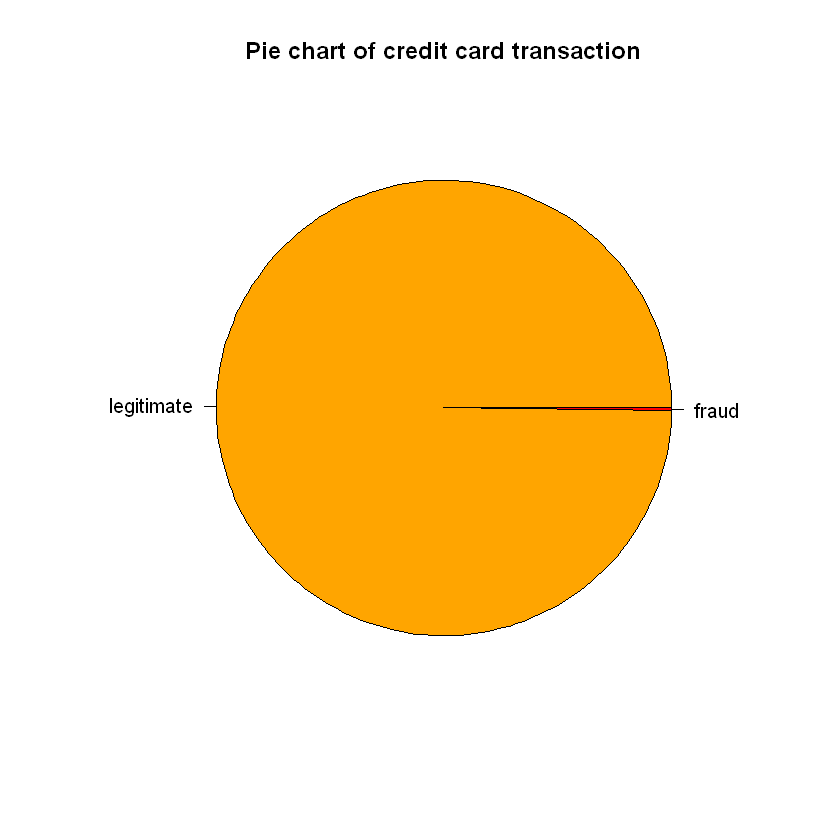

In [16]:
# pie chart of credit card transaction
pie(table(credit_card$Class), labels, col=c('orange', 'red'), main="Pie chart of credit card transaction")

In [17]:
predictions <- rep.int(0, nrow(credit_card))
predictions <- factor(predictions, levels=c(0,1))

In [10]:
#install.packages('caret')

In [18]:
library(caret)

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [15]:
#install.packages('e1071', dependencies=TRUE)

also installing the dependency 'SparseM'



package 'SparseM' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\princ\AppData\Local\Temp\Rtmp69b6KV\downloaded_packages


In [19]:
confusionMatrix(data = predictions, reference=credit_card$Class)

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 284315    492
         1      0      0
                                          
               Accuracy : 0.9983          
                 95% CI : (0.9981, 0.9984)
    No Information Rate : 0.9983          
    P-Value [Acc > NIR] : 0.512           
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.9983          
         Neg Pred Value :    NaN          
             Prevalence : 0.9983          
         Detection Rate : 0.9983          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 0               
            

In [20]:
library(dplyr)

In [21]:
set.seed(1)

In [22]:
credit_card <- credit_card%>%sample_frac(0.1)

In [23]:
table(credit_card$Class)
library(ggplot2)


    0     1 
28437    44 

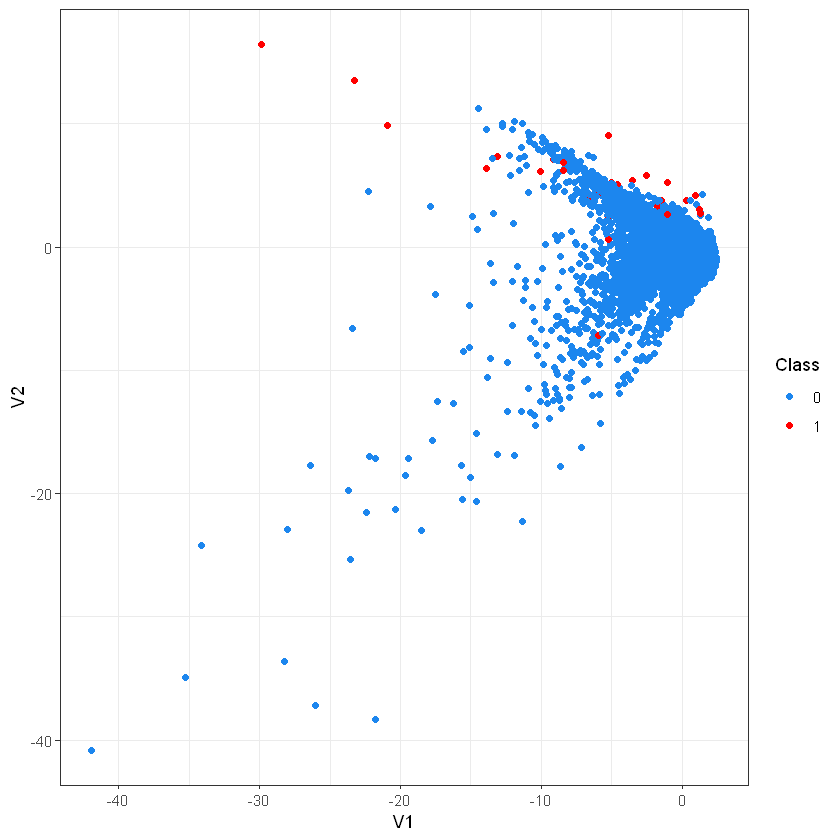

In [24]:
#plot of two variable V1 and V2
#data frame is our credit card data frame
#Second layer is aesthetic layer (AES) which contains variables tha we want 
#to plot
#color of the plot is based on the categories of different classes
#Third layer is geometry layer(geom) for scatter plot
#to change the backgroung of the plot chage the theme to theme_bw
ggplot(data = credit_card, aes(x = V1, y = V2,col=Class))+geom_point()+theme_bw()+scale_color_manual(values = c('dodgerblue2', 'red'))

In [25]:
#install.packages('caTools')

package 'caTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\princ\AppData\Local\Temp\Rtmpoxc7ev\downloaded_packages


In [26]:
library(caTools)
set.seed(123)

Warning message:
"package 'caTools' was built under R version 3.6.3"

In [21]:
# Split the dataset into training and testing dataset
#split ration tells me how many rows I want  in the training set(80%) 
#and testing set(20%)

In [27]:
data_sample=sample.split(credit_card$Class, SplitRatio = 0.80)

In [28]:
train_data=subset(credit_card, data_sample==TRUE)
test_data = subset(credit_card, data_sample == FALSE)
dim(train_data)
dim(test_data)

[1] 22785    31

[1] 5696   31

In [24]:
#Random-Over Sampling (ROS)
#increase the number of fraud cases to oversample the #minority class
#So after running this code 50%cases will be Ligitimate
#and 50% as fraud cases

In [29]:
n_legit<-22750
new_fract_legit<-0.50
new_n_total <- n_legit/new_fract_legit   # = 22750/0.50

In [30]:
#install.packages("ROSE")

package 'ROSE' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\princ\AppData\Local\Temp\Rtmpoxc7ev\downloaded_packages


In [31]:
library(ROSE) 

Warning message:
"package 'ROSE' was built under R version 3.6.3"Loaded ROSE 0.0-3



### Random over sampling 

In [32]:
#ovun.sample is used for random oversampling
#In formula section we have Class and the DOT(.) indicates that rest of the variables are independent variables
#~ is used to separate them
#data is that we want to sample
#N is the total number of rows sampled
#seed function is used to get the same result if you run the program again and again
oversampling_result <- ovun.sample(Class ~., data=train_data,
method = "over",
N = new_n_total,
seed = 2019)
oversampled_credit <- oversampling_result$data
table(oversampled_credit$Class)


    0     1 
22750 22750 

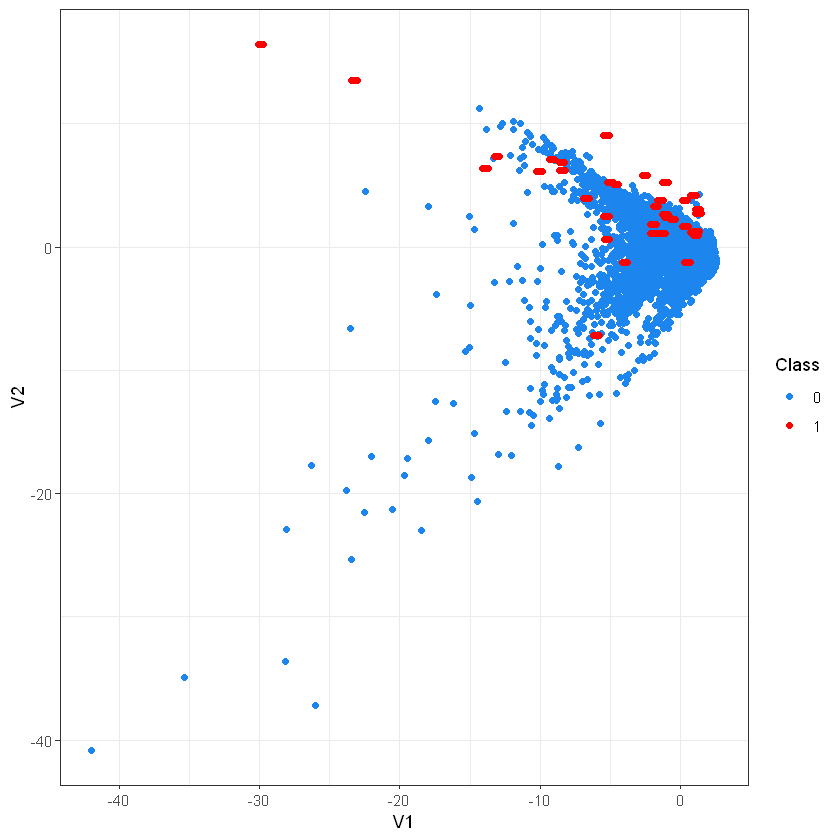

In [33]:
ggplot(data = oversampled_credit, aes(x = V1, y = V2, col = Class))+
geom_point(position = position_jitter(width = 0.2))+
theme_bw()+
scale_color_manual(values = c('dodgerblue2', 'red'))

### Ramdom under sampling

In [34]:
#Random Under-Sampling(RUS)
table(train_data$Class)
n_fraud <- 35
new_frac_fraud <- 0.50
new_nn_total <- n_fraud/new_frac_fraud #  35/0.50


    0     1 
22750    35 

In [35]:
#library(ROSE)
undersampling_result <- ovun.sample(Class ~ . , 
data = train_data,
method = "under",
N = new_nn_total,
seed = 2019)
undersampled_credit <- undersampling_result$data
table(undersampled_credit$Class)


 0  1 
35 35 

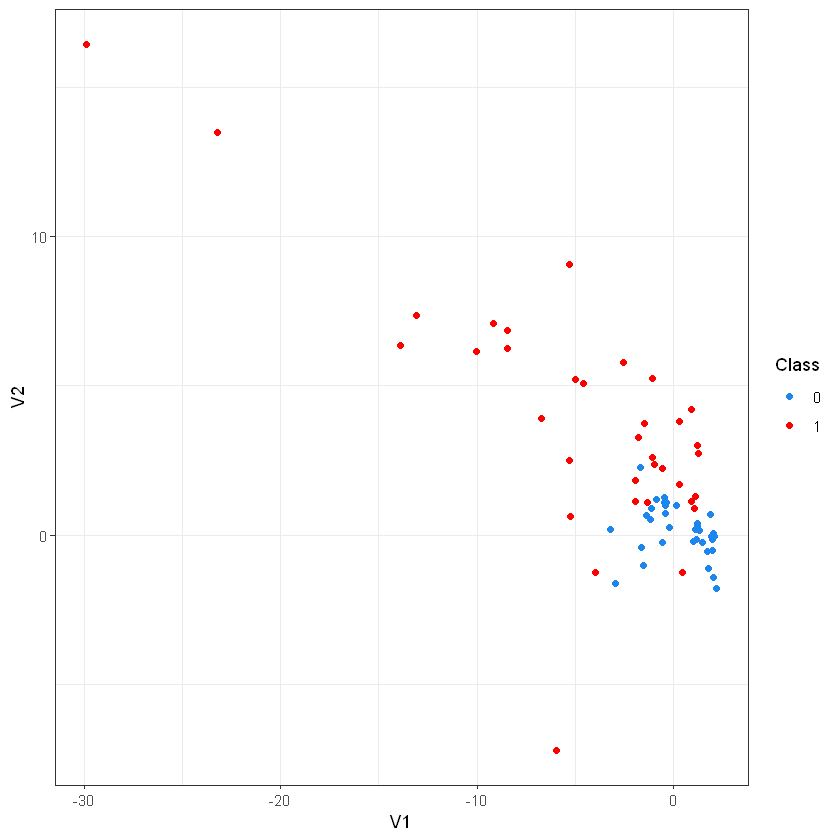

In [36]:
ggplot(data = undersampled_credit, aes(x = V1, y = V2, col = Class))+
geom_point()+
theme_bw()+
scale_color_manual(values = c('dodgerblue2', 'red'))

### ROS and RUS Both

In [37]:
n_new <- nrow(train_data)  # 22785
fraction_fraud_new <- 0.50

In [38]:
sampling_result <- ovun.sample(Class ~ . ,
data = train_data,
method = "both",
N = n_new,
p = fraction_fraud_new,
seed = 2019)
sampled_credit <- sampling_result$data
table(sampled_credit$Class)


    0     1 
11430 11355 

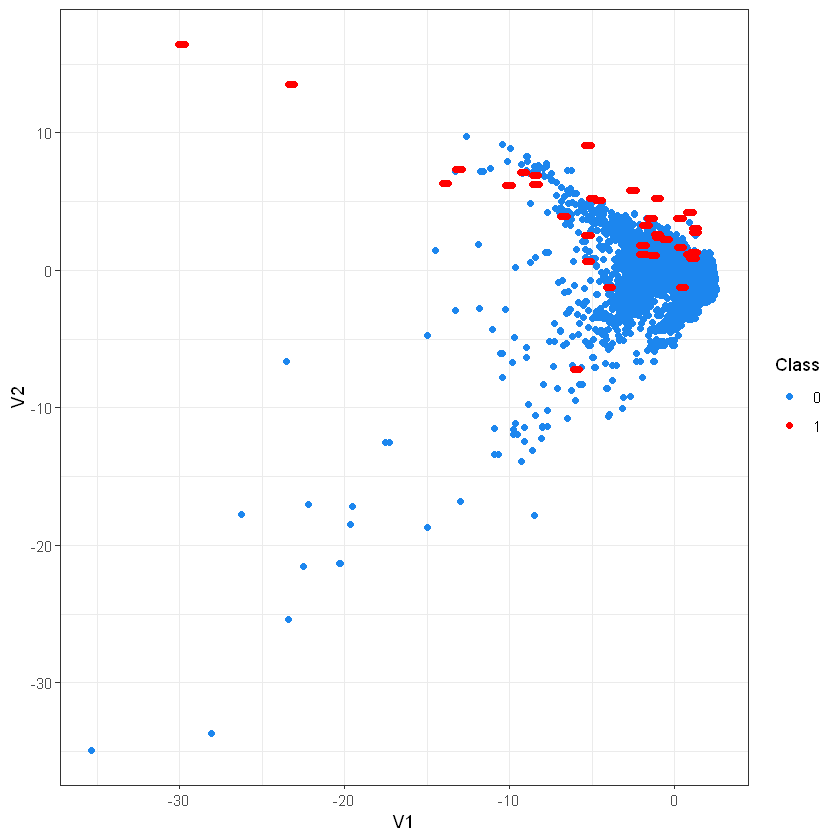

In [39]:
ggplot(data = sampled_credit, aes(x = V1, y = V2, col = Class))+
geom_point(position = position_jitter(width = 0.2))+theme_bw()+
scale_color_manual(values = c('dodgerblue2', 'red'))

### Using SMOTE(Synthetic Minority Oversampling Technique) to balance the dataset

In [40]:
#install.packages("smotefamily")

also installing the dependencies 'FNN', 'dbscan', 'igraph'




  There is a binary version available but the source version is later:
       binary source needs_compilation
dbscan  1.1-6  1.1-8              TRUE

  Binaries will be installed
package 'FNN' successfully unpacked and MD5 sums checked
package 'dbscan' successfully unpacked and MD5 sums checked
package 'igraph' successfully unpacked and MD5 sums checked
package 'smotefamily' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\princ\AppData\Local\Temp\Rtmpoxc7ev\downloaded_packages


In [41]:
library(smotefamily)
table(train_data$Class)

Warning message:
"package 'smotefamily' was built under R version 3.6.3"


    0     1 
22750    35 

In [42]:
#set the number of fraud and ligitimate cases, and the desired percentage of legitimate cases
n0 <- 22750
n1 <- 35
r0 <- 0.6

In [43]:
#calculate the value for the dup_size parameter of smote
ntimes <- ((1-r0)/r0 * (n0 / n1) - 1)
smote_output <- SMOTE(X=train_data[, -c(1, 31)],
target = train_data$Class,
K=5,
dup_size = ntimes)

In [44]:
credit_smote <- smote_output$data
colnames(credit_smote)[30] <- "Class"
prop.table(table(credit_smote$Class))


        0         1 
0.6001847 0.3998153 

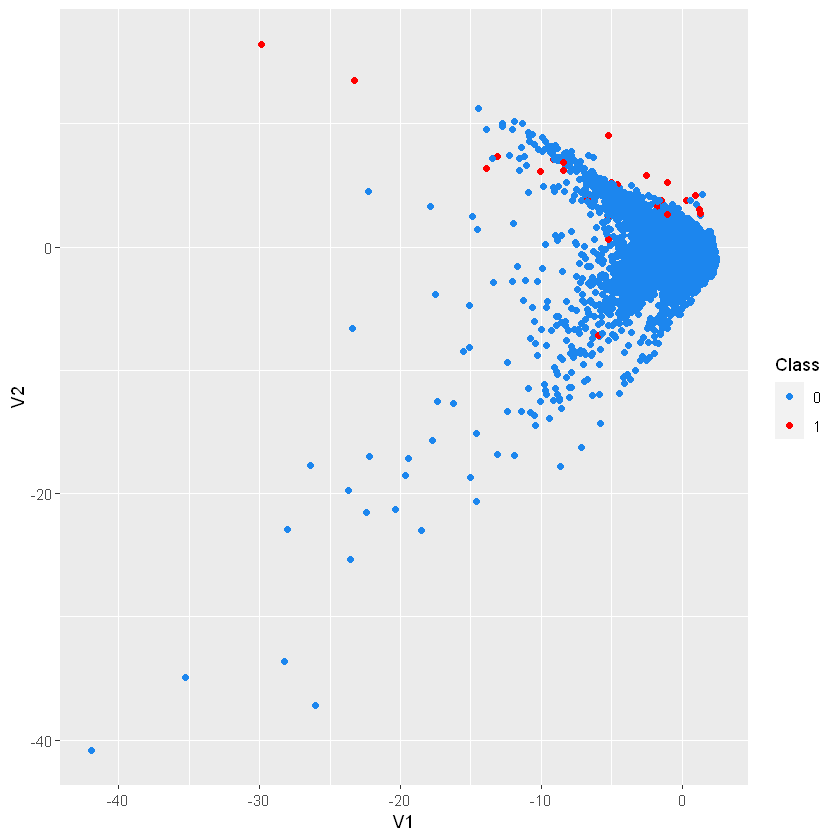

In [45]:
# Class distribution for original datasate
ggplot(train_data, aes(x = V1, y = V2, color = Class))+
geom_point()+
scale_color_manual(values = c('dodgerblue2', 'red'))

In [46]:
#install.packages('rpart.plot')

package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\princ\AppData\Local\Temp\Rtmpoxc7ev\downloaded_packages


In [47]:
#install.packages('rpart')

package 'rpart' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rpart'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Anaconda\envs\rstudio\lib\R\library\00LOCK\rpart\libs\x64\rpart.dll to C:\Anaconda\envs\rstudio\lib\R\library\rpart\libs\x64\rpart.dll: Permission denied"Warning message:
"restored 'rpart'"


The downloaded binary packages are in
	C:\Users\princ\AppData\Local\Temp\Rtmpoxc7ev\downloaded_packages


In [48]:
library(rpart)
library(rpart.plot)

Warning message:
"package 'rpart' was built under R version 3.6.3"Warning message:
"package 'rpart.plot' was built under R version 3.6.3"

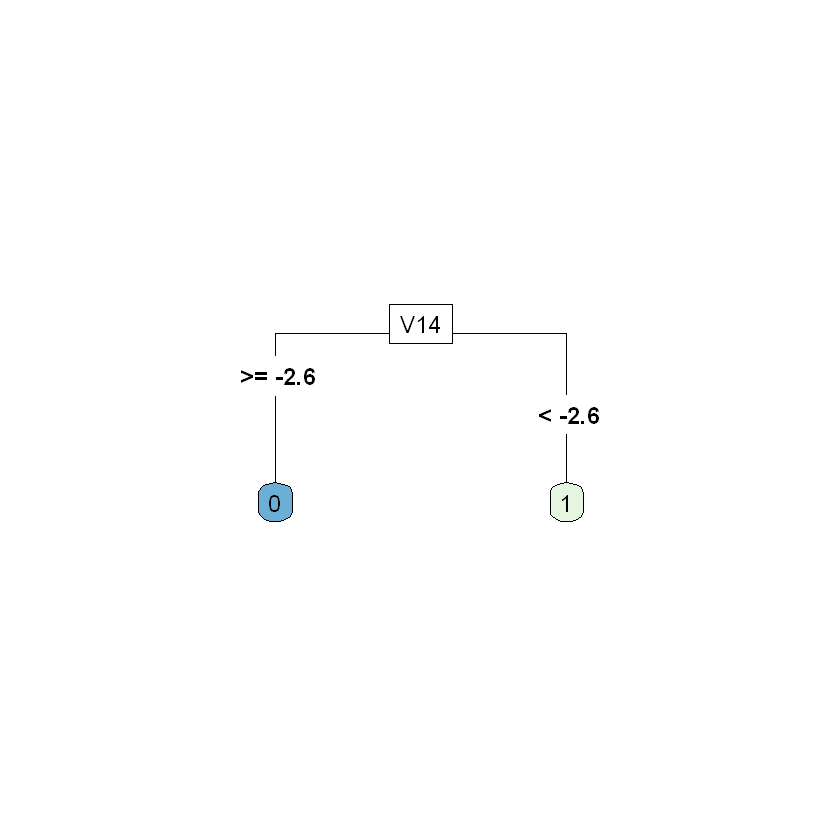

In [49]:
CART_model <- rpart(Class ~ . ,credit_smote)
rpart.plot(CART_model, extra = 0, type = 5, tweak = 1.2)

In [50]:
#predict fraud classes
predicted_val <- predict(CART_model, test_data, type = 'class')

In [51]:
library(caret)
confusionMatrix(predicted_val, test_data$Class)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5625    2
         1   62    7
                                          
               Accuracy : 0.9888          
                 95% CI : (0.9857, 0.9913)
    No Information Rate : 0.9984          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1772          
                                          
 Mcnemar's Test P-Value : 1.643e-13       
                                          
            Sensitivity : 0.9891          
            Specificity : 0.7778          
         Pos Pred Value : 0.9996          
         Neg Pred Value : 0.1014          
             Prevalence : 0.9984          
         Detection Rate : 0.9875          
   Detection Prevalence : 0.9879          
      Balanced Accuracy : 0.8834          
                                          
       'Positive' Class : 0               
                        

In [52]:
predicted_val <- predict(CART_model, credit_card[-1], type = 'class')

In [53]:
confusionMatrix(predicted_val, credit_card$Class)

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 28155     4
         1   282    40
                                          
               Accuracy : 0.99            
                 95% CI : (0.9887, 0.9911)
    No Information Rate : 0.9985          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2164          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9901          
            Specificity : 0.9091          
         Pos Pred Value : 0.9999          
         Neg Pred Value : 0.1242          
             Prevalence : 0.9985          
         Detection Rate : 0.9886          
   Detection Prevalence : 0.9887          
      Balanced Accuracy : 0.9496          
                                          
       'Positive' Class : 0               
                  

### Decision Tree without SMOTE

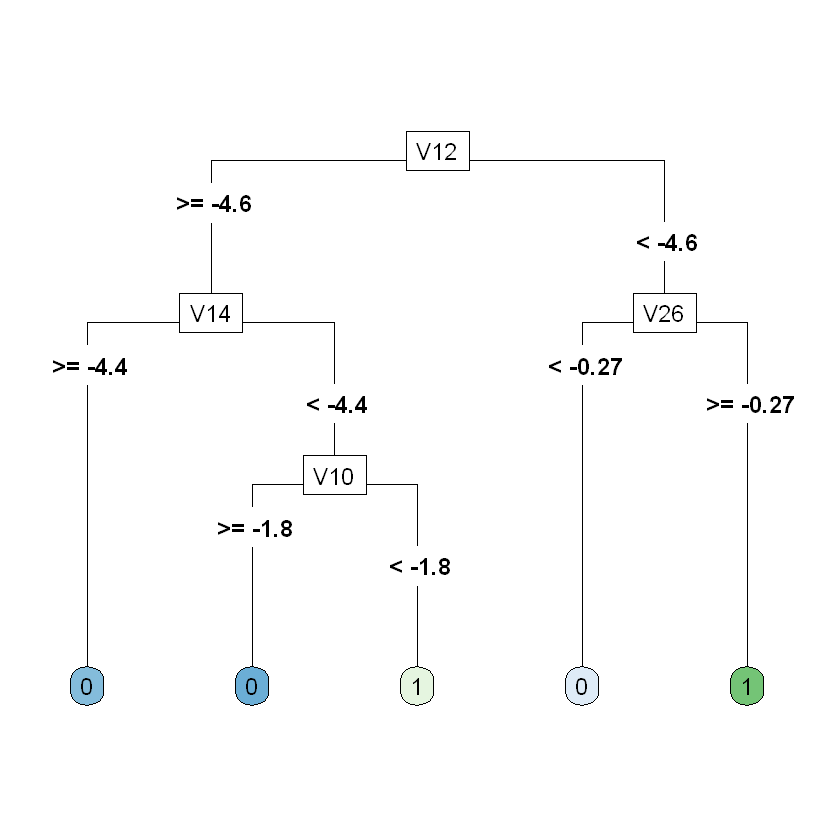

In [54]:
CART_model <- rpart(Class ~ . , train_data [, -1])
rpart.plot(CART_model, extra = 0, type = 5, tweak = 1.2)

In [55]:
# Predict fraud Classes
predicted_val <- predict(CART_model, test_data[-1], type = 'class')

In [56]:
library(caret)
confusionMatrix(predicted_val, test_data$Class)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5686    3
         1    1    6
                                          
               Accuracy : 0.9993          
                 95% CI : (0.9982, 0.9998)
    No Information Rate : 0.9984          
    P-Value [Acc > NIR] : 0.05483         
                                          
                  Kappa : 0.7497          
                                          
 Mcnemar's Test P-Value : 0.61708         
                                          
            Sensitivity : 0.9998          
            Specificity : 0.6667          
         Pos Pred Value : 0.9995          
         Neg Pred Value : 0.8571          
             Prevalence : 0.9984          
         Detection Rate : 0.9982          
   Detection Prevalence : 0.9988          
      Balanced Accuracy : 0.8332          
                                          
       'Positive' Class : 0               
                        